In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [4]:
file_path = r'E:\Projects\Haus\Incrementality Analysis & Marketing ROI Optimization dataset.csv'
df = pd.read_csv(file_path)
df.head()

,date,channel,campaign_type,geo_region,geo_subregion,device,experiment_id,experiment_group,spend,impressions,clicks,conversions,incremental_conversions,revenue,cpm,cpc,cpa,roi,incremental_roi
0,2024-01-01,Search,Retargeting,US,California,Mobile,EXP101,Treatment,2829.984855,169956,1642,49,32,8291.221075,16.651279,1.723499,57.754793,2.929776,1.913323
1,2024-01-01,Search,Retargeting,US,California,Desktop,EXP101,Treatment,2529.632237,101144,820,34,26,7392.536672,25.010206,3.084917,74.400948,2.922376,2.234758
2,2024-01-01,Search,Acquisition,US,Texas,Mobile,EXP101,Treatment,2710.582566,116389,1082,39,30,9052.705333,23.288993,2.505159,69.502117,3.339764,2.569049
3,2024-01-01,Search,Acquisition,US,Texas,Desktop,EXP103,Treatment,1489.957156,71276,445,18,11,1456.897678,20.904051,3.348218,82.775398,0.977812,0.597552
4,2024-01-01,Search,Retargeting,US,New York,Mobile,EXP101,Control,2975.438851,156128,743,27,0,3917.634355,19.057689,4.004628,110.201439,1.316658,0.000000


In [5]:
print("Shape of dataset:", df.shape)  # rows and columns
print("\nColumn names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nSample rows:")
df.head(10)

Shape of dataset: (19656, 19)

Column names: ['date', 'channel', 'campaign_type', 'geo_region', 'geo_subregion', 'device', 'experiment_id', 'experiment_group', 'spend', 'impressions', 'clicks', 'conversions', 'incremental_conversions', 'revenue', 'cpm', 'cpc', 'cpa', 'roi', 'incremental_roi']

Missing values:
 date                       0
channel                    0
campaign_type              0
geo_region                 0
geo_subregion              0
device                     0
experiment_id              0
experiment_group           0
spend                      0
impressions                0
clicks                     0
conversions                0
incremental_conversions    0
revenue                    0
cpm                        0
cpc                        0
cpa                        0
roi                        0
incremental_roi            0
dtype: int64

Sample rows:


,date,channel,campaign_type,geo_region,geo_subregion,device,experiment_id,experiment_group,spend,impressions,clicks,conversions,incremental_conversions,revenue,cpm,cpc,cpa,roi,incremental_roi
0,2024-01-01,Search,Retargeting,US,California,Mobile,EXP101,Treatment,2829.984855,169956,1642,49,32,8291.221075,16.651279,1.723499,57.754793,2.929776,1.913323
1,2024-01-01,Search,Retargeting,US,California,Desktop,EXP101,Treatment,2529.632237,101144,820,34,26,7392.536672,25.010206,3.084917,74.400948,2.922376,2.234758
2,2024-01-01,Search,Acquisition,US,Texas,Mobile,EXP101,Treatment,2710.582566,116389,1082,39,30,9052.705333,23.288993,2.505159,69.502117,3.339764,2.569049
3,2024-01-01,Search,Acquisition,US,Texas,Desktop,EXP103,Treatment,1489.957156,71276,445,18,11,1456.897678,20.904051,3.348218,82.775398,0.977812,0.597552
4,2024-01-01,Search,Retargeting,US,New York,Mobile,EXP101,Control,2975.438851,156128,743,27,0,3917.634355,19.057689,4.004628,110.201439,1.316658,0.000000
5,2024-01-01,Search,Awareness,US,New York,Desktop,EXP103,Control,2804.323803,145731,818,39,0,6699.146435,19.243152,3.428269,71.905739,2.388863,0.000000
6,2024-01-01,Search,Retargeting,EU,Germany,Mobile,EXP101,Treatment,1724.378632,121023,664,31,20,4730.858046,14.248355,2.596956,55.625117,2.743515,1.770009
7,2024-01-01,Search,Retargeting,EU,Germany,Desktop,EXP101,Control,1017.380326,78486,516,20,0,3290.644920,12.962571,1.971667,50.869016,3.234429,0.000000
8,2024-01-01,Search,Awareness,EU,France,Mobile,EXP101,Treatment,1666.952536,106743,880,34,25,5438.337667,15.616504,1.894264,49.028016,3.262443,2.398855
9,2024-01-01,Search,Retargeting,EU,France,Desktop,EXP102,Control,3041.079683,140795,811,35,0,5880.620536,21.599344,3.749790,86.887991,1.933728,0.000000


In [6]:
channel_summary = df.groupby('channel').agg({
    'spend': 'sum',
    'conversions': 'sum',
    'incremental_conversions': 'sum',
    'revenue': 'sum'
}).reset_index()

# Calculate Traditional ROI
channel_summary['traditional_roi'] = channel_summary['revenue'] / channel_summary['spend']

# Calculate Incremental Revenue & Incremental ROI
channel_summary['incremental_revenue'] = (
    channel_summary['incremental_conversions'] *
    (channel_summary['revenue'] / channel_summary['conversions'])
)
channel_summary['incremental_roi'] = channel_summary['incremental_revenue'] / channel_summary['spend']

channel_summary

,channel,spend,conversions,incremental_conversions,revenue,traditional_roi,incremental_revenue,incremental_roi
0,Affiliate,1.316816e+06,21450,9567,3.542581e+06,2.690263,1.580041e+06,1.199895
1,Display,2.630764e+06,11007,4234,1.819053e+06,0.691454,6.997246e+05,0.265978
2,Email,1.069945e+06,25130,11125,4.137014e+06,3.866566,1.831448e+06,1.711721
3,Search,7.393025e+06,127573,60571,2.105292e+07,2.847673,9.995815e+06,1.352060
4,Social,5.393196e+06,69693,32253,1.150998e+07,2.134167,5.326667e+06,0.987664
5,TV,1.471227e+07,40304,18721,6.594984e+06,0.448264,3.063336e+06,0.208216


In [7]:
channel_summary['incrementality_bias'] = (
    (channel_summary['conversions'] - channel_summary['incremental_conversions']) /
    channel_summary['conversions']
)

channel_summary[['channel', 'incrementality_bias']]


,channel,incrementality_bias
0,Affiliate,0.553986
1,Display,0.615336
2,Email,0.557302
3,Search,0.525205
4,Social,0.537213
5,TV,0.535505


In [8]:
# Step 7: Budget Reallocation
total_budget = channel_summary['spend'].sum()
channel_summary['recommended_spend'] = (
    channel_summary['incremental_roi'] / channel_summary['incremental_roi'].sum()
) * total_budget

channel_summary[['channel', 'spend', 'recommended_spend', 'incremental_roi']]

,channel,spend,recommended_spend,incremental_roi
0,Affiliate,1.316816e+06,6.814351e+06,1.199895
1,Display,2.630764e+06,1.510520e+06,0.265978
2,Email,1.069945e+06,9.721075e+06,1.711721
3,Search,7.393025e+06,7.678517e+06,1.352060
4,Social,5.393196e+06,5.609068e+06,0.987664
5,TV,1.471227e+07,1.182487e+06,0.208216


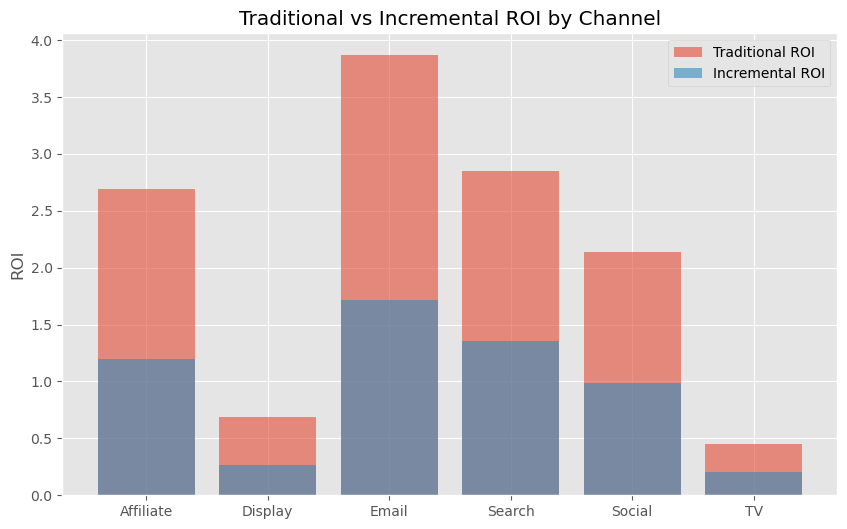

In [9]:
# Traditional vs Incremental ROI
plt.figure(figsize=(10,6))
plt.bar(channel_summary['channel'], channel_summary['traditional_roi'], alpha=0.6, label='Traditional ROI')
plt.bar(channel_summary['channel'], channel_summary['incremental_roi'], alpha=0.6, label='Incremental ROI')
plt.ylabel('ROI')
plt.title('Traditional vs Incremental ROI by Channel')
plt.legend()
plt.show()

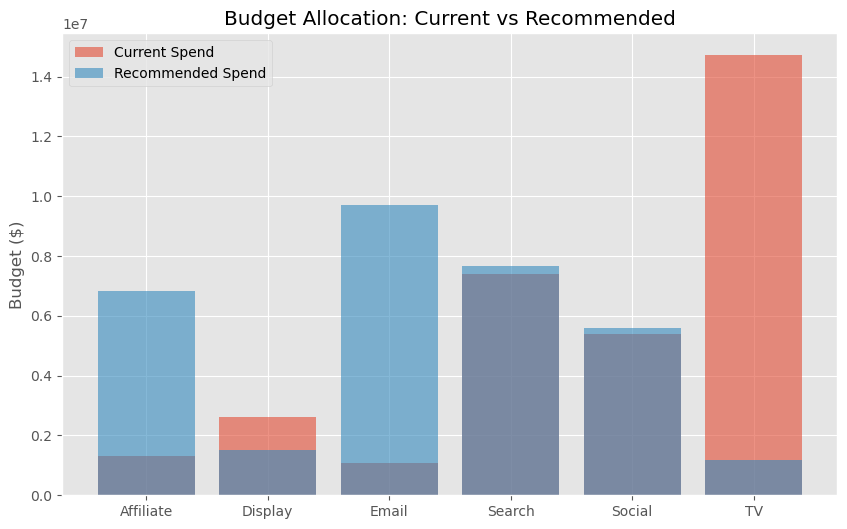

In [10]:
# Current vs Recommended Spend
plt.figure(figsize=(10,6))
plt.bar(channel_summary['channel'], channel_summary['spend'], alpha=0.6, label='Current Spend')
plt.bar(channel_summary['channel'], channel_summary['recommended_spend'], alpha=0.6, label='Recommended Spend')
plt.ylabel('Budget ($)')
plt.title('Budget Allocation: Current vs Recommended')
plt.legend()
plt.show()

In [11]:
# Lift Analysis by Region
region_group = df.groupby(['geo_region', 'experiment_group']).agg({
    'conversions': 'sum'
}).reset_index()

# Pivot for easier comparison
region_pivot = region_group.pivot(index='geo_region', columns='experiment_group', values='conversions').reset_index()

# Calculate Lift
region_pivot['lift'] = (region_pivot['Treatment'] - region_pivot['Control']) / region_pivot['Control']
region_pivot

experiment_group,geo_region,Control,Treatment,lift
0,APAC,32208,66699,1.070883
1,EU,28566,69453,1.431317
2,US,30067,68164,1.267070


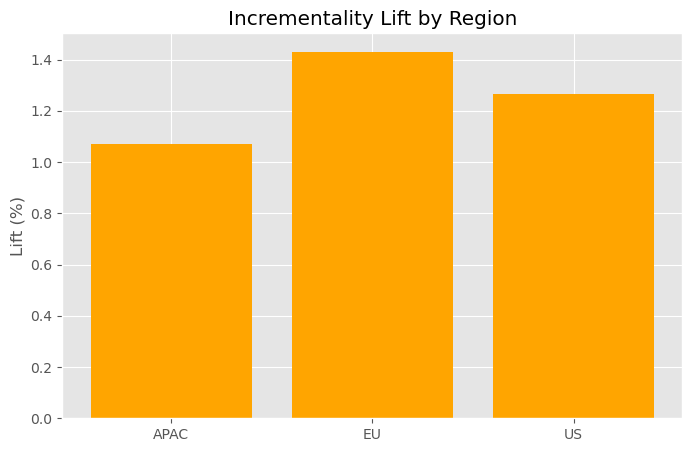

In [12]:
plt.figure(figsize=(8,5))
plt.bar(region_pivot['geo_region'], region_pivot['lift'], color='orange')
plt.ylabel('Lift (%)')
plt.title('Incrementality Lift by Region')
plt.show()


In [13]:
# Simulate customer journeys for MTA (1000 customers)
np.random.seed(42)
customers = []
channels = ['Search', 'Social', 'Display', 'Email', 'Affiliate']

for cust_id in range(1, 1001):
    num_touches = np.random.randint(1, 5)  # Each customer sees 1-4 channels
    touch_sequence = np.random.choice(channels, size=num_touches, replace=False)
    conversion = np.random.choice([1, 0], p=[0.7, 0.3])  # 70% chance they convert
    customers.append([cust_id, list(touch_sequence), conversion])

mta_df = pd.DataFrame(customers, columns=['customer_id', 'touchpoints', 'conversion'])
mta_df.head(10)

,customer_id,touchpoints,conversion
0,1,"[Social, Affiliate, Display]",0
1,2,[Affiliate],1
2,3,[Search],1
3,4,"[Search, Display, Affiliate, Social]",1
4,5,[Affiliate],1
5,6,[Social],1
6,7,"[Search, Social, Display, Affiliate]",1
7,8,"[Search, Social]",1
8,9,"[Social, Search, Email]",1
9,10,"[Affiliate, Display]",1


In [14]:
last_touch = (
    mta_df[mta_df['conversion'] == 1]
    .apply(lambda row: row['touchpoints'][-1], axis=1)
    .value_counts()
    .reset_index()
)
last_touch.columns = ['channel', 'last_touch_conversions']
last_touch

,channel,last_touch_conversions
0,Search,162
1,Email,146
2,Social,142
3,Display,142
4,Affiliate,138


In [15]:
from collections import defaultdict

linear_credit = defaultdict(float)
for _, row in mta_df.iterrows():
    if row['conversion'] == 1:
        credit = 1 / len(row['touchpoints'])
        for ch in row['touchpoints']:
            linear_credit[ch] += credit

linear_df = pd.DataFrame(list(linear_credit.items()), columns=['channel', 'linear_conversions'])
linear_df

,channel,linear_conversions
0,Affiliate,147.083333
1,Search,151.416667
2,Display,149.083333
3,Social,140.583333
4,Email,141.833333


In [16]:
incrementality_df = df.groupby('channel')['incremental_conversions'].sum().reset_index()
incrementality_df.columns = ['channel', 'incrementality_conversions']
incrementality_df

,channel,incrementality_conversions
0,Affiliate,9567
1,Display,4234
2,Email,11125
3,Search,60571
4,Social,32253
5,TV,18721


In [17]:
mta_compare = last_touch.merge(linear_df, on='channel').merge(incrementality_df, on='channel')
mta_compare

,channel,last_touch_conversions,linear_conversions,incrementality_conversions
0,Search,162,151.416667,60571
1,Email,146,141.833333,11125
2,Social,142,140.583333,32253
3,Display,142,149.083333,4234
4,Affiliate,138,147.083333,9567


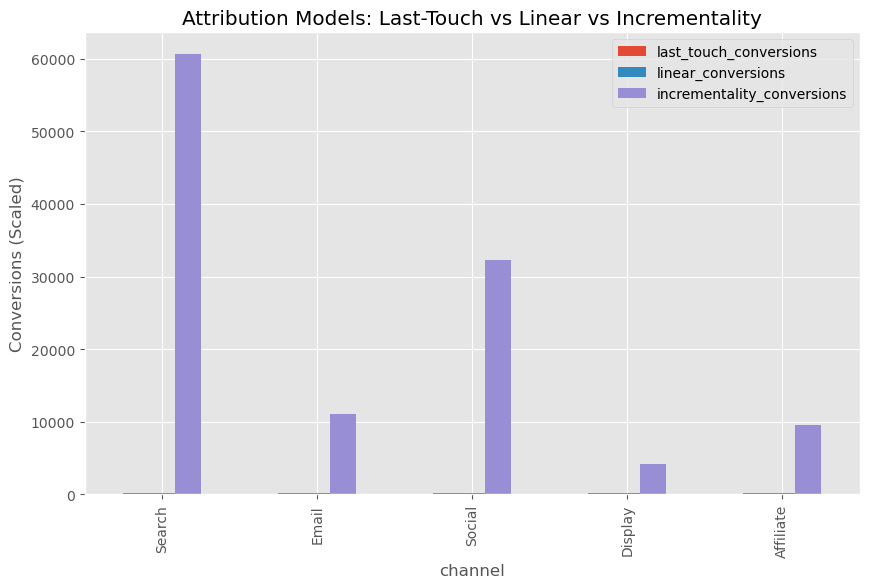

In [18]:
mta_compare.set_index('channel').plot(kind='bar', figsize=(10,6))
plt.title('Attribution Models: Last-Touch vs Linear vs Incrementality')
plt.ylabel('Conversions (Scaled)')
plt.show()

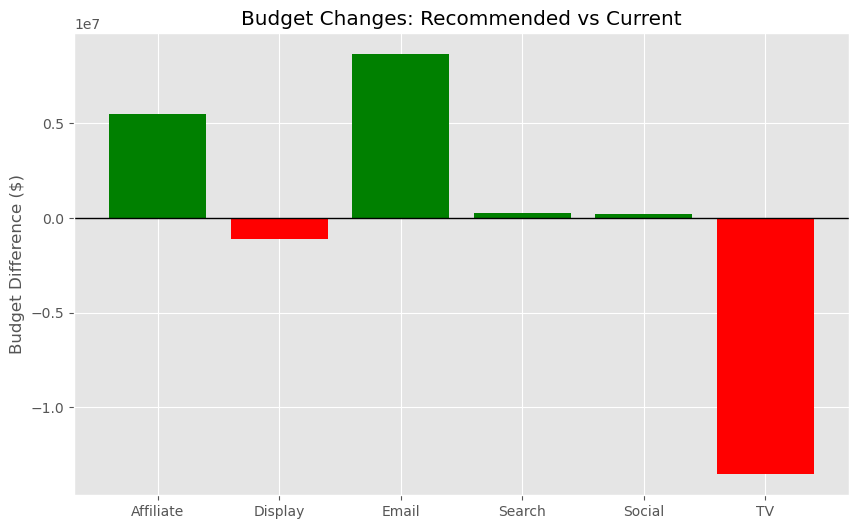

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
budget_diff = channel_summary['recommended_spend'] - channel_summary['spend']
channels = channel_summary['channel']

plt.figure(figsize=(10,6))
plt.bar(channels, budget_diff, color=['green' if x > 0 else 'red' for x in budget_diff])
plt.axhline(0, color='black', linewidth=1)
plt.title('Budget Changes: Recommended vs Current')
plt.ylabel('Budget Difference ($)')
plt.show()